In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and understanding the data

In [286]:
master_data = pd.read_csv('day.csv')

In [287]:
master_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [288]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### There are total 730 rows and 15 columns in the original dataset.
#### There is no missing data in the dataset hence no missing value treatment is required.

In [422]:
# column instant is the unique identifier for the data and not adding any value to our observation hence it can be dropped
# create data variable after dropping the column, further operations will be performed on data 
# dropping columns casual and registered as they seems to be the break of cnt by category
# dropping column dteday as the month and year information is already available in other columns
data = master_data.drop(['instant','casual','registered','dteday'],axis = 1)

In [423]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [424]:
#checking if there is any duplicates present in the data
# there is no change in the shape of data hence we can conclude that there are no duplicates in the data
data.drop_duplicates().shape


(730, 12)

In [425]:
# Replacing categorical columns season, mnth, weekday and weathersit with their text values instead of numeric representation 
# as there is no order between the categorical variables.
data.weathersit = data.weathersit.map({1:'clear', 2:'mist', 3:'light_snow' , 4: 'heavy_rain'})
data.season = data.season.map({1:'spring', 2:'summer', 3:'fall' , 4: 'winter'})
data.mnth = data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
data.weekday = data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [426]:
data.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349


### Visualizing the data

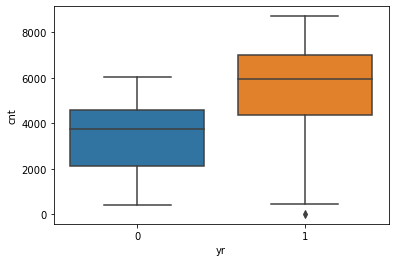

In [427]:
#plotting box plot to observe the bike sharing increase in 2019 compare to 2018
sns.boxplot(data=data , x= 'yr',y='cnt')
plt.show()

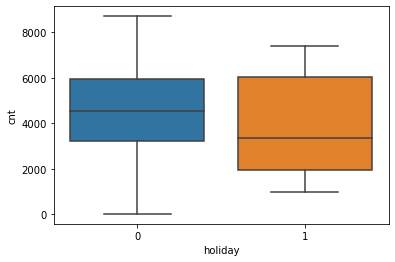

In [428]:
#plotting box plot to understand distribution of cnt against holiday
sns.boxplot(data=data , x= 'holiday',y='cnt')
plt.show()

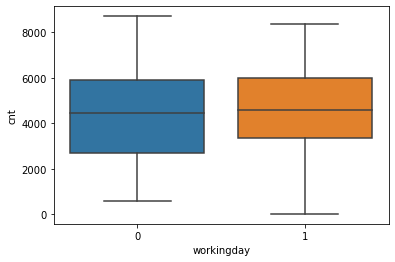

In [429]:
#plotting box plot to understand distribution of cnt against workingday
sns.boxplot(data=data , x= 'workingday',y='cnt')
plt.show()

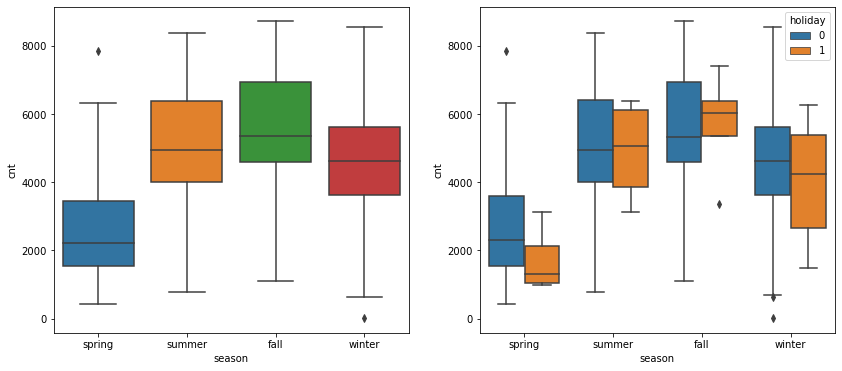

In [430]:
#plotting box plot to understand distribution of cnt against season
fig = plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(data = data , x= 'season', y = 'cnt')
plt.subplot(122)
sns.boxplot(data = data , x= 'season', y = 'cnt',hue = 'holiday')
plt.show()

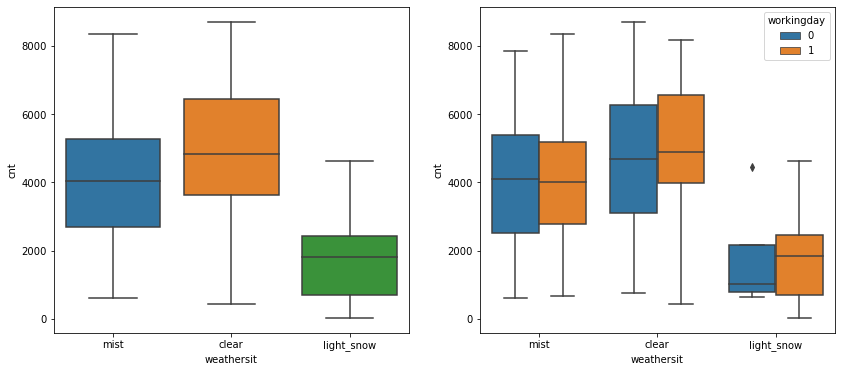

In [431]:
#plotting box plot to understand distribution of cnt against weather
fig = plt.figure(figsize = (14,6))
plt.subplot(121)
sns.boxplot(data = data , x= 'weathersit', y = 'cnt')
plt.subplot(122)
sns.boxplot(data = data , x= 'weathersit', y = 'cnt',hue = 'workingday')
plt.show()

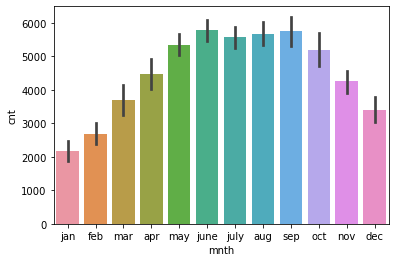

In [432]:
sns.barplot(data=data,x='mnth',y='cnt')
plt.show()

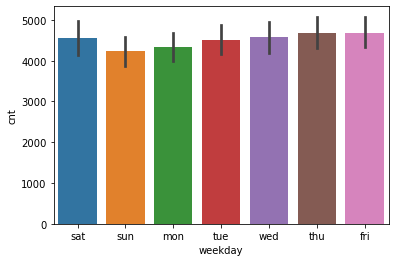

In [433]:
sns.barplot(data=data,x='weekday',y='cnt')
plt.show()

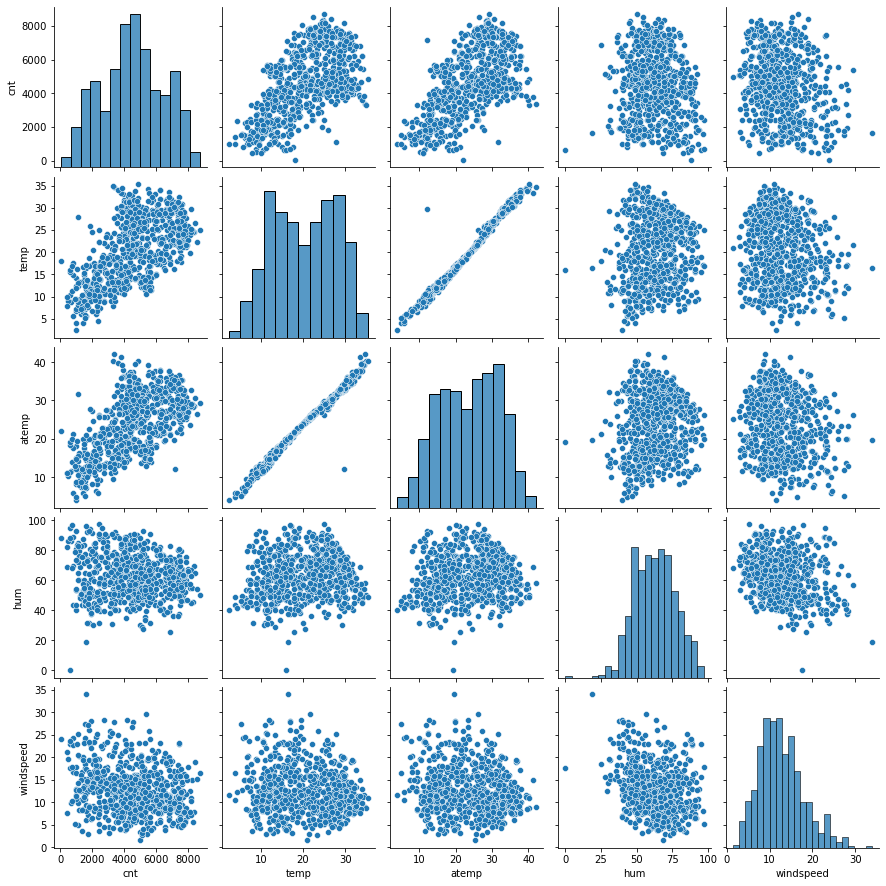

In [435]:
# Drawing pait plot between numerical variables
cols = ['cnt','temp','atemp','hum','windspeed']
sns.pairplot(data[cols])
plt.show()

Here we see target variable `cnt` has very good linear relationship with `temp,atemp, casual and registered `variables.
Also we see temp and atemp variables have a solid linear relationship between them hence we will drop atemp moving forward.

In [335]:
data = data.drop('atemp',axis =1 )

In [337]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,dt
0,spring,0,jan,0,sat,0,mist,14.110847,80.5833,10.749882,331,654,985,1
1,spring,0,jan,0,sun,0,mist,14.902598,69.6087,16.652113,131,670,801,1
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,120,1229,1349,1
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,108,1454,1562,1
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,82,1518,1600,1


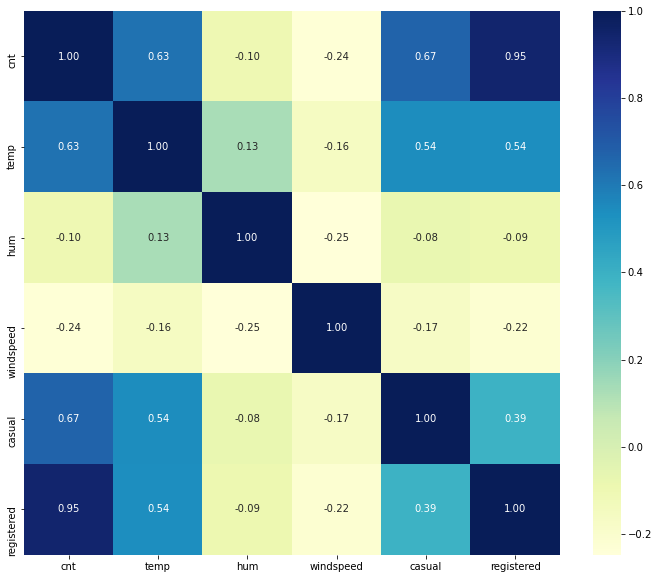

In [340]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(data[['cnt','temp','hum','windspeed','casual','registered']].corr(),annot=True,cmap='YlGnBu',fmt = '.2f')
plt.show()

### Observation:
Target variable `cnt` has good correlation with following independent variables. 
##### Independent variables with positive correlation : temp, casual and registered 
##### Independent variables with negative correlation : windspeed

# Step 2 : Data Preparation

Creating dummy values for categorical variables season, month ,weekday and weathersit. After dummy values are created for categorical variables they will be dropped from the dataset

In [341]:
# This function will create dummy variable and return the data set by adding dummy variables and will drop the 
# categorical variable from the dataset
def addDummyVariableAndDropCategory(data,var):
    dummy_var = pd.get_dummies(data[var],drop_first=True)
    data = pd.concat([data,dummy_var],axis = 1)
    return data.drop(var,axis = 1)

In [347]:
data = addDummyVariableAndDropCategory(data,'season')
data = addDummyVariableAndDropCategory(data,'mnth')
data = addDummyVariableAndDropCategory(data,'weekday')
data = addDummyVariableAndDropCategory(data,'weathersit')

In [349]:
data.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,dt,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
0,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,1,0,0


# Step 3 : Creating test and train datasets

In [351]:
# dividing 70% data into train and 30% data into test
df_train , df_test = train_test_split(data , train_size = 0.7 , random_state = 100)

In [353]:
print(f'size of train data {df_train.shape}')
print(f'size of test data {df_test.shape}')

size of train data (510, 32)
size of test data (220, 32)


In [360]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   casual      510 non-null    int64  
 7   registered  510 non-null    int64  
 8   cnt         510 non-null    int64  
 9   dt          510 non-null    int64  
 10  spring      510 non-null    uint8  
 11  summer      510 non-null    uint8  
 12  winter      510 non-null    uint8  
 13  aug         510 non-null    uint8  
 14  dec         510 non-null    uint8  
 15  feb         510 non-null    uint8  
 16  jan         510 non-null    uint8  
 17  july        510 non-null    uint8  
 18  june        510 non-null    uint8  
 19  mar         510 non-null   

In [362]:
# Next we will scale the numeric variables using MinMax scaling.
scale = MinMaxScaler()
colsToScale = ['temp','hum','windspeed','casual','registered','cnt']
df_train[colsToScale] = scale.fit_transform(df_train[colsToScale])

In [363]:
# Training dataset after scaling
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,dt,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,31,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,3,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,30,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,28,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095,22,...,0,0,0,0,0,0,0,0,0,1


In [364]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,dt,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.254689,0.523781,0.513499,15.631373,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.206015,0.227896,0.224421,8.852724,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.212740,0.525123,0.518638,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [367]:
# Creating variable X_train and Y_train for model building
X_train = df_train
y_train = X_train.pop('cnt')

# Step 4 : Building linear regression model

In [384]:
# We will use RFE ( Recursive feature elimination) to get top 15 features which are useful for model building
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
rfe = RFE(lr_model,15).fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 4),
 ('workingday', True, 1),
 ('temp', False, 13),
 ('hum', False, 8),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('dt', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', False, 15),
 ('aug', False, 10),
 ('dec', False, 17),
 ('feb', False, 2),
 ('jan', False, 14),
 ('july', False, 7),
 ('june', False, 3),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 6),
 ('sep', True, 1),
 ('mon', False, 12),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', True, 1),
 ('tue', False, 11),
 ('wed', False, 16),
 ('light_snow', False, 9),
 ('mist', False, 5)]

In [392]:
# Following variables are considered as top 15 features useful for building the model
colsForModel = list(X_train.columns[rfe.support_])

# since we know that temp has very good correlation with target variable hence we will consider temp also 
# for model building even though it is eliminated through RFE

# colsForModel.append('temp')
print(f'columns considered for model evaluation {colsForModel}')

columns considered for model evaluation ['yr', 'workingday', 'windspeed', 'casual', 'registered', 'dt', 'spring', 'summer', 'mar', 'may', 'nov', 'sep', 'sat', 'sun', 'thu']


In [393]:
X_train_1 = X_train[colsForModel]
X_train_1.head()

,yr,workingday,windspeed,casual,registered,dt,spring,summer,mar,may,nov,sep,sat,sun,thu
576,1,1,0.264686,0.294422,0.899220,31,0,0,0,0,0,0,0,0,0
426,1,0,0.255342,0.290765,0.446145,3,1,0,1,0,0,0,1,0,0
728,1,0,0.663106,0.110332,0.203869,30,1,0,0,0,0,0,0,1,0
482,1,0,0.188475,0.340750,0.444701,28,0,1,0,0,0,0,1,0,0
111,0,1,0.380981,0.053337,0.214554,22,0,1,0,0,0,0,0,0,0


In [382]:
# Function to train the model using statsmodels and displaying summary metrics
def train_sm_model_and_showSummary(X,y):
    # adding constant to work with statsmodels
    X_train_sm = sm.add_constant(X)
    lr_sm = sm.OLS(y,X_train_sm).fit() # training the model
    return lr_sm.summary() # printing summary

In [388]:
# Function to calculate VIF (Variance inflation factor) on data
def calculateVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [395]:
# Building Model 1 on the 16 features using statsmodels.api

# Model 1 

train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.825e+28
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:32:35   Log-Likelihood:                 15853.
No. Observations:                 510   AIC:                        -3.167e+04
Df Residuals:                     494   BIC:                        -3.161e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-16   2.81e-15      0.099      0.921   -5.24e-15    5.79e-15
yr         -8.431e-16   1.07e-15     -0.786      0.432   -2.95e-15    1.26e-15
workingday -1.665e-16   2.38e-15     -0.070      0.944   -4.84e-15    4.51e-15
windspeed  -3.678e-16   2.19e-15     -0.168      0.867   -4.67e-15    3.93e-15
casual         0.3775   3.04e-15   1.24e+14      0.000       0.377       0.377
registered     0.7968   3.43e-15   2.32e+14      0.000       0.797       0.797
dt         -4.077e-16   3.99e-17    -10.205      0.000   -4.86e-16   -3.29e-16
spring     -6.939e-17   1.28e-15     -0.054      0.957   -2.59e-15    2.45e-15
summer      5.551e-17   1.12e-15      0.049      0.961   -2.15e-15    2.26e-15
mar         3.678e-16   1.28e-15      0.287      0.774   -2.15e-15    2.89e-15
may         -2.22e-16   1.51e-15     -0.147      0.883   -3.19e-15    2.75e-15
nov        -2.359e-16   1.37e-15     -0.172      0.863   -2.93e-15    2.46e-15
sep        -4.163e-17   1.37e-15     -0.030      0.976   -2.73e-15    2.65e-15
sat        -9.021e-17   2.39e-15     -0.038      0.970   -4.78e-15     4.6e-15
sun         5.551e-17    2.4e-15      0.023      0.982   -4.65e-15    4.77e-15
thu         6.939e-17   1.05e-15      0.066      0.947      -2e-15    2.14e-15
==============================================================================
Omnibus:                      247.393   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.596
Skew:                          -0.014   Prob(JB):                     6.17e-07
Kurtosis:                       1.840   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [396]:
# VIF on the train data set
calculateVIF(X_train_1)

,Features,VIF
4,registered,29.63
1,workingday,16.31
3,casual,8.17
2,windspeed,4.79
0,yr,4.68
5,dt,4.01
12,sat,3.80
13,sun,3.31
6,spring,2.71
7,summer,2.57


In [397]:
# working day has high p-value (0.944) and high VIF (16.31) hence we will drop workinday and retrain model

# Model 2

X_train_1 = X_train_1.drop('workingday',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.470e+29
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:33:42   Log-Likelihood:                 16670.
No. Observations:                 510   AIC:                        -3.331e+04
Df Residuals:                     495   BIC:                        -3.325e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.388e-15   4.02e-16     -3.456      0.001   -2.18e-15   -5.99e-16
yr          9.714e-17   2.13e-16      0.457      0.648   -3.21e-16    5.15e-16
windspeed  -9.714e-17   4.41e-16     -0.221      0.826   -9.63e-16    7.68e-16
casual         0.3775   5.87e-16   6.44e+14      0.000       0.377       0.377
registered     0.7968   6.58e-16   1.21e+15      0.000       0.797       0.797
dt         -3.946e-17   8.04e-18     -4.910      0.000   -5.53e-17   -2.37e-17
spring     -3.608e-16   2.58e-16     -1.399      0.163   -8.68e-16    1.46e-16
summer      1.249e-16   2.26e-16      0.553      0.581   -3.19e-16    5.69e-16
mar         9.368e-17   2.57e-16      0.364      0.716   -4.11e-16    5.99e-16
may        -1.665e-16   3.04e-16     -0.548      0.584   -7.64e-16    4.31e-16
nov        -3.747e-16   2.72e-16     -1.376      0.169    -9.1e-16     1.6e-16
sep         4.302e-16   2.75e-16      1.566      0.118    -1.1e-16     9.7e-16
sat         1.067e-16   2.78e-16      0.383      0.702    -4.4e-16    6.53e-16
sun         3.539e-16   2.88e-16      1.231      0.219   -2.11e-16    9.19e-16
thu        -1.874e-16   2.12e-16     -0.885      0.377   -6.03e-16    2.29e-16
==============================================================================
Omnibus:                        5.909   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.683
Skew:                           0.217   Prob(JB):                       0.0584
Kurtosis:                       2.720   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
calculateVIF(X_train_1)

,Features,VIF
3,registered,12.99
2,casual,7.64
1,windspeed,4.29
4,dt,3.77
0,yr,3.65
6,summer,2.44
11,sat,2.26
12,sun,2.12
5,spring,2.10
8,may,1.62


In [399]:
# windspeed has high p-value (0.826) and  VIF (4.29) hence we will drop windspeed and retrain model

# Model 3

X_train_1 = X_train_1.drop('windspeed',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.302e+29
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:35:54   Log-Likelihood:                 16350.
No. Observations:                 510   AIC:                        -3.267e+04
Df Residuals:                     496   BIC:                        -3.261e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.679e-15   6.74e-16     -2.490      0.013      -3e-15   -3.54e-16
yr          3.018e-16   3.93e-16      0.768      0.443   -4.71e-16    1.07e-15
casual         0.3775   1.09e-15   3.46e+14      0.000       0.377       0.377
registered     0.7968   1.22e-15   6.54e+14      0.000       0.797       0.797
dt         -8.587e-17    1.5e-17     -5.714      0.000   -1.15e-16   -5.63e-17
spring      4.441e-16   4.82e-16      0.921      0.358   -5.03e-16    1.39e-15
summer      3.192e-16   4.17e-16      0.766      0.444   -4.99e-16    1.14e-15
mar         1.006e-16    4.8e-16      0.210      0.834   -8.42e-16    1.04e-15
may         1.041e-16   5.67e-16      0.184      0.854   -1.01e-15    1.22e-15
nov        -1.152e-15   5.09e-16     -2.264      0.024   -2.15e-15   -1.52e-16
sep         9.714e-16   5.14e-16      1.891      0.059   -3.77e-17    1.98e-15
sat        -6.618e-16   5.19e-16     -1.274      0.203   -1.68e-15    3.59e-16
sun        -1.804e-16   5.38e-16     -0.336      0.737   -1.24e-15    8.76e-16
thu        -3.296e-16   3.96e-16     -0.833      0.405   -1.11e-15    4.48e-16
==============================================================================
Omnibus:                       17.616   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.934
Skew:                           0.162   Prob(JB):                      0.00696
Kurtosis:                       2.398   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [400]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,11.62
1,casual,7.44
3,dt,3.66
0,yr,3.63
5,summer,2.18
10,sat,2.15
11,sun,2.03
4,spring,1.77
7,may,1.60
6,mar,1.34


In [402]:
# may has high p-value (0.854) hence we will drop may and retrain model

# Model 4

X_train_1 = X_train_1.drop('may',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.733e+29
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:37:44   Log-Likelihood:                 16562.
No. Observations:                 510   AIC:                        -3.310e+04
Df Residuals:                     497   BIC:                        -3.304e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.637e-16   4.43e-16     -0.595      0.552   -1.13e-15    6.08e-16
yr         -3.816e-16   2.57e-16     -1.485      0.138   -8.87e-16    1.23e-16
casual         0.3775   7.19e-16   5.25e+14      0.000       0.377       0.377
registered     0.7968   7.98e-16   9.98e+14      0.000       0.797       0.797
dt         -1.141e-16    9.9e-18    -11.522      0.000   -1.34e-16   -9.46e-17
spring      1.665e-16   3.16e-16      0.528      0.598   -4.53e-16    7.86e-16
summer      1.527e-16   2.37e-16      0.645      0.519   -3.12e-16    6.18e-16
mar         1.527e-16   3.11e-16      0.491      0.623   -4.58e-16    7.63e-16
nov         2.637e-16   3.35e-16      0.786      0.432   -3.95e-16    9.23e-16
sep         4.163e-17   3.39e-16      0.123      0.902   -6.24e-16    7.07e-16
sat         1.579e-16   3.43e-16      0.461      0.645   -5.15e-16    8.31e-16
sun         1.457e-16   3.54e-16      0.411      0.681   -5.51e-16    8.42e-16
thu        -1.041e-17   2.61e-16     -0.040      0.968   -5.23e-16    5.03e-16
==============================================================================
Omnibus:                      197.146   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.177
Skew:                           0.070   Prob(JB):                     1.26e-06
Kurtosis:                       1.878   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [403]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,11.52
1,casual,7.44
3,dt,3.63
0,yr,3.58
9,sat,2.14
10,sun,2.03
4,spring,1.75
5,summer,1.59
6,mar,1.29
8,sep,1.25


In [404]:
# thu has high p-value (0.968) hence we will drop thu and retrain model

# Model 5

X_train_1 = X_train_1.drop('thu',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.567e+30
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:39:06   Log-Likelihood:                 16922.
No. Observations:                 510   AIC:                        -3.382e+04
Df Residuals:                     498   BIC:                        -3.377e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.608e-16   2.18e-16      1.654      0.099   -6.77e-17    7.89e-16
yr          3.782e-16   1.27e-16      2.982      0.003    1.29e-16    6.27e-16
casual         0.3775   3.55e-16   1.06e+15      0.000       0.377       0.377
registered     0.7968   3.94e-16   2.02e+15      0.000       0.797       0.797
dt         -4.944e-17   4.89e-18    -10.119      0.000    -5.9e-17   -3.98e-17
spring     -2.082e-16   1.56e-16     -1.337      0.182   -5.14e-16    9.78e-17
summer     -8.327e-17   1.17e-16     -0.713      0.476   -3.13e-16    1.46e-16
mar         2.116e-16   1.53e-16      1.382      0.168   -8.93e-17    5.13e-16
nov        -8.327e-17   1.65e-16     -0.504      0.615   -4.08e-16    2.42e-16
sep         4.163e-17   1.67e-16      0.249      0.803   -2.87e-16     3.7e-16
sat        -3.383e-16   1.68e-16     -2.015      0.044   -6.68e-16   -8.49e-18
sun         -2.22e-16   1.74e-16     -1.277      0.202   -5.64e-16    1.19e-16
==============================================================================
Omnibus:                       42.033   Durbin-Watson:                   0.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.325
Skew:                          -0.065   Prob(JB):                     0.000775
Kurtosis:                       2.189   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [405]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,11.23
1,casual,7.43
3,dt,3.63
0,yr,3.56
9,sat,2.12
10,sun,2.01
4,spring,1.74
5,summer,1.59
6,mar,1.29
8,sep,1.25


In [406]:
# sep has high p-value (0.803) hence we will drop sep and retrain model

# Model 6

X_train_1 = X_train_1.drop('sep',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.896e+30
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:40:17   Log-Likelihood:                 16928.
No. Observations:                 510   AIC:                        -3.383e+04
Df Residuals:                     499   BIC:                        -3.379e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.053e-16   2.15e-16     -1.422      0.156   -7.27e-16    1.16e-16
yr          4.476e-16   1.25e-16      3.586      0.000    2.02e-16    6.93e-16
casual         0.3775   3.49e-16   1.08e+15      0.000       0.377       0.377
registered     0.7968   3.88e-16   2.05e+15      0.000       0.797       0.797
dt         -1.388e-17   4.82e-18     -2.879      0.004   -2.33e-17   -4.41e-18
spring     -4.302e-16   1.53e-16     -2.821      0.005    -7.3e-16   -1.31e-16
summer     -6.245e-17   1.11e-16     -0.561      0.575   -2.81e-16    1.56e-16
mar         5.551e-17   1.51e-16      0.367      0.714   -2.42e-16    3.53e-16
nov        -2.776e-17   1.61e-16     -0.172      0.863   -3.45e-16    2.89e-16
sat        -6.783e-16   1.66e-16     -4.094      0.000      -1e-15   -3.53e-16
sun        -4.233e-16   1.72e-16     -2.468      0.014    -7.6e-16   -8.63e-17
==============================================================================
Omnibus:                       13.571   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.631
Skew:                           0.165   Prob(JB):                     1.22e-05
Kurtosis:                       3.978   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [407]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,10.71
1,casual,7.41
3,dt,3.63
0,yr,3.49
8,sat,2.12
9,sun,2.01
4,spring,1.72
5,summer,1.49
6,mar,1.29
7,nov,1.21


In [408]:
# nov has high p-value (0.863) hence we will drop nov and retrain model

# Model 7

X_train_1 = X_train_1.drop('nov',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.707e+29
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:41:21   Log-Likelihood:                 16437.
No. Observations:                 510   AIC:                        -3.285e+04
Df Residuals:                     500   BIC:                        -3.281e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.082e-15   5.43e-16     -1.992      0.047   -2.15e-15   -1.47e-17
yr         -1.561e-16   3.25e-16     -0.481      0.631   -7.94e-16    4.82e-16
casual         0.3775      9e-16    4.2e+14      0.000       0.377       0.377
registered     0.7968   1.01e-15   7.89e+14      0.000       0.797       0.797
dt         -9.584e-17   1.26e-17     -7.606      0.000   -1.21e-16   -7.11e-17
spring     -5.065e-16   3.79e-16     -1.338      0.181   -1.25e-15    2.37e-16
summer      2.498e-16   2.82e-16      0.885      0.377   -3.05e-16    8.05e-16
mar        -2.949e-16   3.95e-16     -0.746      0.456   -1.07e-15    4.82e-16
sat         3.105e-16   4.32e-16      0.718      0.473   -5.39e-16    1.16e-15
sun         1.665e-16   4.48e-16      0.372      0.710   -7.13e-16    1.05e-15
==============================================================================
Omnibus:                       72.028   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.187
Skew:                           0.159   Prob(JB):                     4.13e-05
Kurtosis:                       2.079   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,10.32
1,casual,7.06
3,dt,3.57
0,yr,3.49
7,sat,2.07
8,sun,1.94
4,spring,1.65
5,summer,1.46
6,mar,1.29


In [410]:
# sun has high p-value (0.710) hence we will drop sun and retrain model

# Model 8

X_train_1 = X_train_1.drop('sun',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.084e+30
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:47:38   Log-Likelihood:                 16619.
No. Observations:                 510   AIC:                        -3.322e+04
Df Residuals:                     501   BIC:                        -3.318e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.065e-16   3.41e-16     -1.487      0.138   -1.18e-15    1.63e-16
yr          7.633e-17   2.16e-16      0.353      0.724   -3.48e-16    5.01e-16
casual         0.3775   4.83e-16   7.81e+14      0.000       0.377       0.377
registered     0.7968   5.71e-16   1.39e+15      0.000       0.797       0.797
dt         -5.594e-17   8.81e-18     -6.351      0.000   -7.33e-17   -3.86e-17
spring     -5.135e-16   2.63e-16     -1.952      0.052   -1.03e-15    3.45e-18
summer       4.51e-17   1.95e-16      0.232      0.817   -3.37e-16    4.27e-16
mar         4.094e-16   2.76e-16      1.486      0.138   -1.32e-16    9.51e-16
sat         3.469e-17   2.45e-16      0.141      0.888   -4.47e-16    5.17e-16
==============================================================================
Omnibus:                       89.612   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.158
Skew:                           0.229   Prob(JB):                     5.68e-06
Kurtosis:                       2.037   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [411]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,8.38
1,casual,4.24
0,yr,3.44
3,dt,3.37
7,sat,1.55
4,spring,1.52
5,summer,1.45
6,mar,1.28


In [412]:
# sat has high p-value (0.888) hence we will drop sat and retrain model

# Model 9

X_train_1 = X_train_1.drop('sat',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.418e+30
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:48:54   Log-Likelihood:                 16653.
No. Observations:                 510   AIC:                        -3.329e+04
Df Residuals:                     502   BIC:                        -3.326e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.082e-17   3.13e-16     -0.067      0.947   -6.35e-16    5.94e-16
yr          6.072e-17   2.01e-16      0.302      0.763   -3.34e-16    4.56e-16
casual         0.3775   3.99e-16   9.46e+14      0.000       0.377       0.377
registered     0.7968   5.09e-16   1.57e+15      0.000       0.797       0.797
dt         -7.633e-17   8.23e-18     -9.275      0.000   -9.25e-17   -6.02e-17
spring     -1.735e-17   2.46e-16     -0.071      0.944      -5e-16    4.66e-16
summer     -1.041e-16   1.81e-16     -0.575      0.566    -4.6e-16    2.52e-16
mar         4.545e-16   2.57e-16      1.765      0.078   -5.13e-17     9.6e-16
==============================================================================
Omnibus:                       23.705   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.868
Skew:                          -0.210   Prob(JB):                      0.00161
Kurtosis:                       2.345   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [413]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,7.85
0,yr,3.44
3,dt,3.32
1,casual,3.14
4,spring,1.47
5,summer,1.45
6,mar,1.28


In [414]:
# spring has high p-value (0.944) hence we will drop spring and retrain model

# Model 10

X_train_1 = X_train_1.drop('spring',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.961e+30
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:49:53   Log-Likelihood:                 16875.
No. Observations:                 510   AIC:                        -3.374e+04
Df Residuals:                     503   BIC:                        -3.371e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.782e-16   1.44e-16     -2.625      0.009   -6.61e-16   -9.51e-17
yr         -2.949e-16   1.18e-16     -2.490      0.013   -5.28e-16   -6.22e-17
casual         0.3775   2.48e-16   1.52e+15      0.000       0.377       0.377
registered     0.7968   2.77e-16   2.87e+15      0.000       0.797       0.797
dt         -5.594e-17   5.24e-18    -10.682      0.000   -6.62e-17   -4.57e-17
summer      8.674e-17    1.1e-16      0.791      0.429   -1.29e-16    3.02e-16
mar         1.839e-16   1.58e-16      1.162      0.246   -1.27e-16    4.95e-16
==============================================================================
Omnibus:                       40.483   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.897
Skew:                           0.129   Prob(JB):                     0.000582
Kurtosis:                       2.203   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [415]:
calculateVIF(X_train_1)

,Features,VIF
2,registered,7.82
0,yr,3.29
3,dt,3.10
1,casual,3.09
4,summer,1.39
5,mar,1.09


In [416]:
# summer has high p-value (0.429) hence we will drop summer and retrain model

# Model 11

X_train_1 = X_train_1.drop('summer',axis = 1)
train_sm_model_and_showSummary(X_train_1,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.322e+30
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:51:06   Log-Likelihood:                 16692.
No. Observations:                 510   AIC:                        -3.337e+04
Df Residuals:                     504   BIC:                        -3.335e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.251e-16   2.05e-16     -3.530      0.000   -1.13e-15   -3.22e-16
yr          1.301e-17   1.69e-16      0.077      0.939   -3.19e-16    3.45e-16
casual         0.3775   3.49e-16   1.08e+15      0.000       0.377       0.377
registered     0.7968   3.96e-16   2.01e+15      0.000       0.797       0.797
dt         -6.115e-17   7.49e-18     -8.166      0.000   -7.59e-17   -4.64e-17
mar          1.18e-16   2.25e-16      0.524      0.601   -3.24e-16     5.6e-16
==============================================================================
Omnibus:                      231.925   Durbin-Watson:                   0.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.963
Skew:                           0.104   Prob(JB):                     5.14e-07
Kurtosis:                       1.851   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Creating dummy values for categorical variables season and weathersit. After dummy values are created for categorical variables they will be dropped from the dataset

In [135]:
# for season categorical variable
season_dummy = pd.get_dummies(data.season,drop_first=True)
data = pd.concat([data,season_dummy],axis = 1)
data = data.drop('season',axis = 1)

In [136]:
# for weathersit categorical variable
weathersit_dummy = pd.get_dummies(data.weathersit,drop_first=True)
data = pd.concat([data,weathersit_dummy],axis = 1)
data = data.drop('weathersit',axis = 1)

In [137]:
data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dt,spring,summer,winter,light snow,mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,1,0,0,0,0


Converting temp,atemp,hum and windspeed to consider values only upto 2 decimal digits

In [146]:
cols = ['temp','atemp','hum','windspeed']
data[cols] = data[cols].apply(lambda x : round(x,2))
data.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dt,spring,summer,winter,light snow,mist
0,0,1,0,6,0,14.11,18.18,80.58,10.75,331,654,985,1,1,0,0,0,1
1,0,1,0,0,0,14.90,17.69,69.61,16.65,131,670,801,1,1,0,0,0,1
2,0,1,0,1,1,8.05,9.47,43.73,16.64,120,1229,1349,1,1,0,0,0,0
3,0,1,0,2,1,8.20,10.61,59.04,10.74,108,1454,1562,1,1,0,0,0,0
4,0,1,0,3,1,9.31,11.46,43.70,12.52,82,1518,1600,1,1,0,0,0,0


#### Finding correlation between target variable (cnt) and the predictor variables

In [97]:
data.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dt,spring,summer,winter,light snow,mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319329,23.726384,62.765082,12.763699,849.249315,3658.757534,4508.006849,15.720548,0.246575,0.252055,0.243836,0.028767,0.336986
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506827,8.150247,14.237634,5.195640,686.479875,1559.758728,1936.011647,8.802278,0.431313,0.434490,0.429689,0.167266,0.473004
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.420000,3.950000,0.000000,1.500000,2.000000,20.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.810000,16.892500,52.000000,9.040000,316.250000,2502.250000,3169.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465000,24.370000,62.625000,12.130000,717.000000,3664.500000,4548.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.882500,30.445000,72.990000,15.627500,1096.500000,4783.250000,5966.000000,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.330000,42.040000,97.250000,34.000000,3410.000000,6946.000000,8714.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


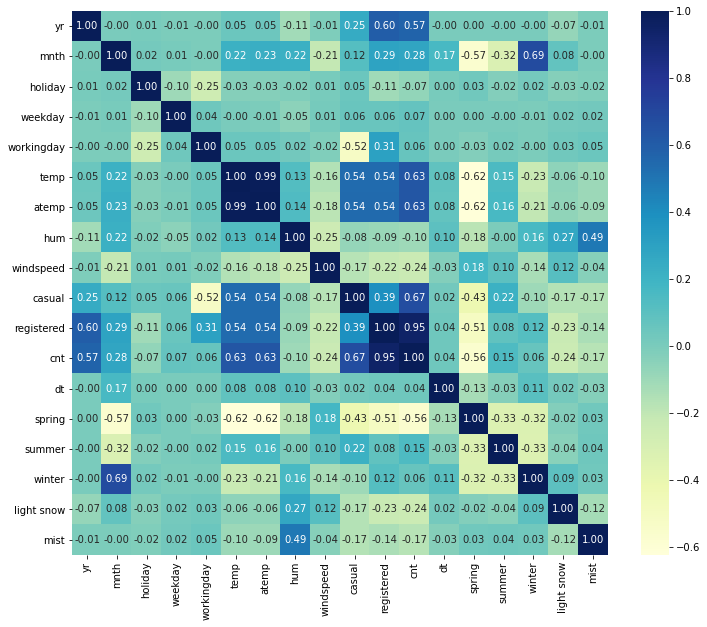

In [138]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',fmt = '.2f')
plt.show()

### Observation:
Target variable cnt has good correlation with following independent variables. We will further draw pair plot to understant more about linear relationship of target variable with these predictor variables. Here we have taken variables which has correlation of atleast greater than 0.2 (positive or negative)
##### Independent variables with positive correlation : yr, mnth, temp, atemp , casual and registered 
##### Independent variables with negative correlation : windspeed,spring and light snow

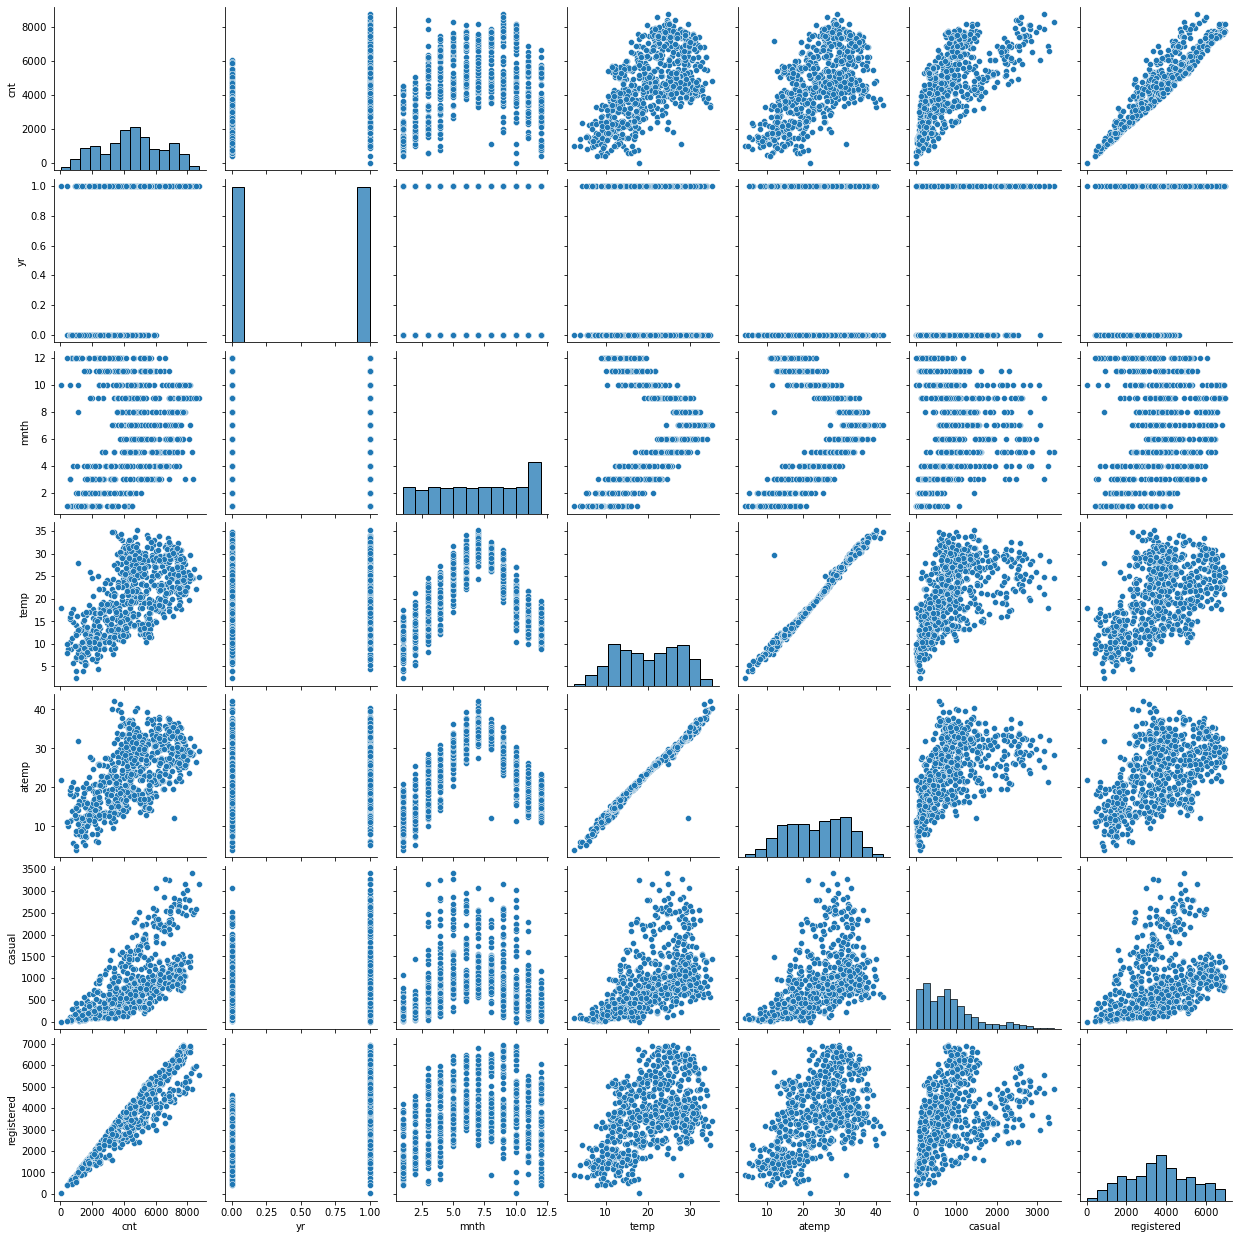

In [139]:
# pair plot between target variable and independent variables having positive correlation
cols = ['cnt','yr','mnth','temp','atemp','casual','registered']
sns.pairplot(data[cols])
plt.show()

Here we see target variable has very good linear relationship with temp,atemp, casual and registered variables
Also we see some of the independent variables have linear relationship between them which we will take care of going forward.

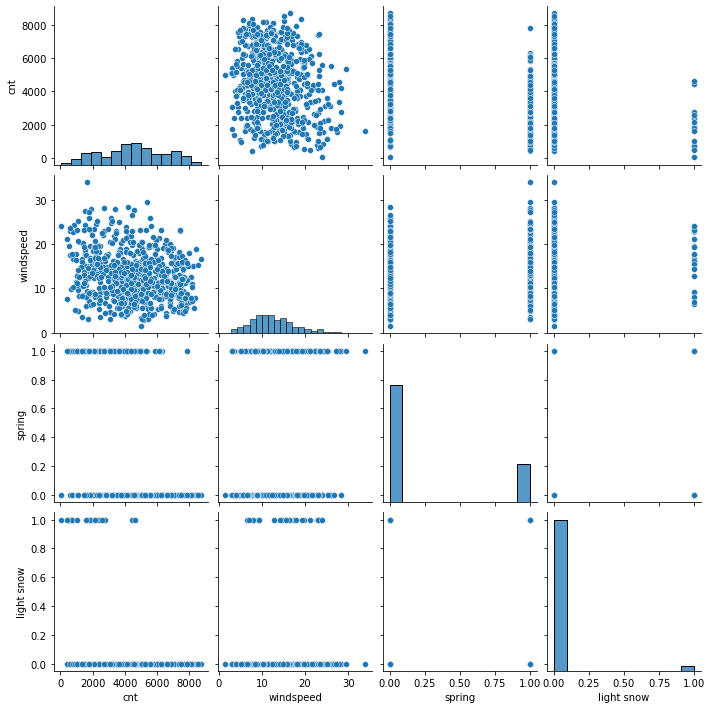

In [140]:
# pair plot between target variable and independent variables having negative correlation
cols = ['cnt','windspeed','spring','light snow']
sns.pairplot(data[cols])
plt.show()

Here we see there is good linear relationship between windspeed and target variable but in a negative direction

In [251]:
# splitting the data into train and test set, 30% data will be used as test data for model evaluation.
df_train , df_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [252]:
print(f'size of train data {df_train.shape}')
print(f'size of test data {df_test.shape}')

size of train data (510, 18)
size of test data (220, 18)


#### We will be normalizing continous variables (excluding dummy variables and binary variables) along with target variables. We will be using min max scaling for this exercise

In [253]:
scale = MinMaxScaler()
colsToScale = ['mnth','weekday','temp','atemp','hum','windspeed','casual','registered','cnt','dt']
df_train[colsToScale] = scale.fit_transform(df_train[colsToScale])

/Users/vivektrivedi/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vivektrivedi/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [219]:
# This is how the data looks like after scaling
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,dt,spring,summer,winter,light snow,mist
576,1,0.545455,0,0.333333,1,0.815254,0.766343,0.725680,0.264678,0.294422,0.899220,1.000000,0,0,0,0,0
426,1,0.181818,0,1.000000,0,0.442419,0.438960,0.640148,0.255374,0.290765,0.446145,0.066667,1,0,0,0,1
728,1,1.000000,0,0.000000,0,0.245214,0.200315,0.498042,0.663138,0.110332,0.203869,0.966667,1,0,0,0,0
482,1,0.272727,0,1.000000,0,0.395624,0.391966,0.504534,0.188643,0.340750,0.444701,0.900000,0,1,0,0,1
111,0,0.272727,0,0.833333,1,0.345792,0.318981,0.751855,0.381136,0.053337,0.214554,0.700000,0,1,0,0,1


In [214]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,dt,spring,summer,winter,light snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.498366,0.676471,0.537477,0.513266,0.650490,0.320981,0.254689,0.523781,0.513499,0.487712,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.315038,0.157763,0.336182,0.468282,0.225814,0.212417,0.145849,0.169776,0.206015,0.227896,0.224421,0.295091,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339866,0.332174,0.538644,0.199230,0.094179,0.353487,0.356420,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.542692,0.529929,0.653751,0.296760,0.212740,0.525123,0.518638,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735339,0.688632,0.754818,0.414501,0.327415,0.696073,0.684710,0.733333,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the model

In [254]:
# Creating X and y variable to feed into the model
y_train = df_train.pop('cnt')
X_train = df_train

In [255]:
def train_sm_model_and_showSummary(X,y):
    # adding constant to work with statsmodels
    X_train_sm = sm.add_constant(X)
    lr_sm = sm.OLS(y,X_train_sm).fit() # training the model
    return lr_sm.summary() # printing summary

In [256]:
## MODEL 1
# Building base model using all the variables 
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.641e+29
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:28:32   Log-Likelihood:                 16758.
No. Observations:                 510   AIC:                        -3.348e+04
Df Residuals:                     492   BIC:                        -3.340e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.661e-16   5.79e-16      1.150      0.251   -4.72e-16     1.8e-15
yr         -6.245e-17   2.02e-16     -0.308      0.758    -4.6e-16    3.35e-16
mnth       -1.553e-16   3.68e-16     -0.422      0.673   -8.79e-16    5.68e-16
holiday     6.731e-16   3.92e-16      1.719      0.086   -9.64e-17    1.44e-15
weekday     7.008e-16    1.8e-16      3.896      0.000    3.47e-16    1.05e-15
workingday  2.377e-16   2.33e-16      1.022      0.307   -2.19e-16    6.95e-16
temp        1.443e-15      2e-15      0.721      0.471   -2.49e-15    5.37e-15
atemp      -1.443e-15   2.02e-15     -0.714      0.476   -5.42e-15    2.53e-15
hum         2.776e-17   5.62e-16      0.049      0.961   -1.08e-15    1.13e-15
windspeed   1.388e-17   4.01e-16      0.035      0.972   -7.75e-16    8.03e-16
casual         0.3775   5.69e-16   6.63e+14      0.000       0.377       0.377
registered     0.7968   6.77e-16   1.18e+15      0.000       0.797       0.797
dt          9.021e-17   2.05e-16      0.441      0.660   -3.12e-16    4.92e-16
spring     -4.163e-16   3.33e-16     -1.251      0.211   -1.07e-15    2.37e-16
summer       2.29e-16   2.26e-16      1.013      0.312   -2.15e-16    6.73e-16
winter     -9.714e-17   2.71e-16     -0.358      0.720    -6.3e-16    4.36e-16
light snow -1.943e-16   4.22e-16     -0.460      0.646   -1.02e-15    6.35e-16
mist        6.939e-17    1.6e-16      0.434      0.664   -2.45e-16    3.83e-16
==============================================================================
Omnibus:                        5.702   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                3.886
Skew:                          -0.019   Prob(JB):                        0.143
Kurtosis:                       2.574   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Obersvations:
1. This model is giving perfect R-square of 1.
2. yr, mnth, atemp, spring, winter and light snow has negative coefficients which means they are negatively impacting the target variable cnt.
3. For some variables like yr, mnth , workingday , temp , atemp , hum, windspeed, dt , winter , light snow and mist have p-values higher than accepted value of (.05).
4. prob of F-statistics is 0 which means model is significant


#### We will use RFE (Recursive feature elimination) for feature selection

In [257]:
def displayRFEcolumns(X_train,y_train,noOfFeatures):
    lr_model = LinearRegression()
    lr_model.fit(X_train,y_train)
    rfe = RFE(lr_model,noOfFeatures).fit(X_train,y_train)
    return list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [258]:
# Trying to find out best 12 independent variables for the model out of 17 features
displayRFEcolumns(X_train,y_train,12)

/Users/vivektrivedi/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[('yr', False, 6),
 ('mnth', False, 4),
 ('holiday', False, 5),
 ('weekday', False, 3),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('dt', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1)]

We will remove following columns from the train data set and generate the summary metrics to find out if there is any imporvement or not
* yr
* mnth
* holiday
* weekday
* summer

In [262]:
## MODEL 2
cols = ['yr','mnth','holiday', 'weekday' , 'summer']
X_train = X_train.drop(cols,axis = 1)
train_sm_model_and_showSummary(X_train,y_train) # generating the statsmodels summary after dropping the 5 cols

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.565e+29
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:34:00   Log-Likelihood:                 16441.
No. Observations:                 510   AIC:                        -3.286e+04
Df Residuals:                     497   BIC:                        -3.280e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.554e-15   9.34e-16      1.664      0.097   -2.81e-16    3.39e-15
workingday -3.608e-16    3.9e-16     -0.924      0.356   -1.13e-15    4.06e-16
temp        2.109e-15   3.49e-15      0.604      0.546   -4.76e-15    8.97e-15
atemp      -1.443e-15   3.67e-15     -0.393      0.694   -8.65e-15    5.77e-15
hum        -6.106e-16   1.03e-15     -0.595      0.552   -2.63e-15    1.41e-15
windspeed   1.388e-16   7.12e-16      0.195      0.845   -1.26e-15    1.54e-15
casual         0.3775   1.01e-15   3.74e+14      0.000       0.377       0.377
registered     0.7968   7.91e-16   1.01e+15      0.000       0.797       0.797
dt          2.498e-16   3.78e-16      0.660      0.509   -4.94e-16    9.93e-16
spring      5.464e-17   4.12e-16      0.133      0.894   -7.54e-16    8.63e-16
winter      3.088e-16    3.5e-16      0.883      0.378   -3.78e-16    9.96e-16
light snow  2.637e-16    7.4e-16      0.356      0.722   -1.19e-15    1.72e-15
mist        6.314e-16   2.87e-16      2.203      0.028    6.82e-17    1.19e-15
==============================================================================
Omnibus:                        0.157   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.925   Jarque-Bera (JB):                0.067
Skew:                           0.018   Prob(JB):                        0.967
Kurtosis:                       3.044   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can see that there are some variables with high p-value so we will calculate VIF to find out if there is any correlation between independent variables

In [265]:
def calculateVIF(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [263]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,temp,352.97
2,atemp,352.40
3,hum,24.56
6,registered,17.05
5,casual,8.61
0,workingday,8.29
4,windspeed,4.08
7,dt,3.84
8,spring,2.48
9,winter,2.36


#### Variables temp and atemp have very high VIF which means these variables are highly correlated with the independent variables , also both the variables have high p-value so we will drop atemp because it has higher p-value than temp

In [264]:
## MODEL 3
X_train = X_train.drop('atemp',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.520e+29
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:39:57   Log-Likelihood:                 16479.
No. Observations:                 510   AIC:                        -3.293e+04
Df Residuals:                     498   BIC:                        -3.288e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.992e-16   8.65e-16      1.155      0.249   -7.01e-16     2.7e-15
workingday -1.527e-16   3.62e-16     -0.422      0.674   -8.64e-16    5.59e-16
temp        6.661e-16   8.11e-16      0.821      0.412   -9.27e-16    2.26e-15
hum         6.939e-16    9.5e-16      0.731      0.465   -1.17e-15    2.56e-15
windspeed   2.082e-16   6.52e-16      0.319      0.750   -1.07e-15    1.49e-15
casual         0.3775   9.37e-16   4.03e+14      0.000       0.377       0.377
registered     0.7968   7.33e-16   1.09e+15      0.000       0.797       0.797
dt          4.372e-16    3.5e-16      1.248      0.213   -2.51e-16    1.13e-15
spring      7.971e-16   3.82e-16      2.088      0.037     4.7e-17    1.55e-15
winter      1.131e-15   3.23e-16      3.496      0.001    4.95e-16    1.77e-15
light snow  4.372e-16   6.84e-16      0.639      0.523   -9.07e-16    1.78e-15
mist       -1.596e-16   2.66e-16     -0.601      0.548   -6.82e-16    3.62e-16
==============================================================================
Omnibus:                       19.060   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.109
Skew:                          -0.468   Prob(JB):                     4.30e-05
Kurtosis:                       2.732   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
calculateVIF(X_train)

,Features,VIF
2,hum,24.08
1,temp,21.03
5,registered,17.05
4,casual,8.60
0,workingday,8.28
3,windspeed,3.99
6,dt,3.83
7,spring,2.48
8,winter,2.34
10,mist,2.34


#### Model 3 is better than model 2 as there is no impact to R-square and Adjusted R-square and variables with higher p-values are lesser compare to model 2. But still we see there is high VIF and high p-value for hum. Next we will remove hum and evaluate model


In [267]:
## MODEL 4
X_train = X_train.drop('hum',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.538e+30
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:45:15   Log-Likelihood:                 16979.
No. Observations:                 510   AIC:                        -3.394e+04
Df Residuals:                     499   BIC:                        -3.389e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.829e-16   2.53e-16     -2.306      0.022   -1.08e-15   -8.63e-17
workingday  -6.28e-16   1.36e-16     -4.626      0.000   -8.95e-16   -3.61e-16
temp        1.041e-16   2.93e-16      0.355      0.723   -4.72e-16    6.81e-16
windspeed   1.943e-16   2.33e-16      0.835      0.404   -2.63e-16    6.52e-16
casual         0.3775   3.51e-16   1.08e+15      0.000       0.377       0.377
registered     0.7968   2.73e-16   2.92e+15      0.000       0.797       0.797
dt          2.193e-15   1.31e-16     16.750      0.000    1.94e-15    2.45e-15
spring      4.736e-16   1.43e-16      3.310      0.001    1.92e-16    7.55e-16
winter     -6.106e-16   1.19e-16     -5.128      0.000   -8.45e-16   -3.77e-16
light snow  2.064e-16   2.42e-16      0.854      0.394   -2.69e-16    6.82e-16
mist        4.545e-16   8.31e-17      5.472      0.000    2.91e-16    6.18e-16
==============================================================================
Omnibus:                       22.077   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.402
Skew:                          -0.336   Prob(JB):                     0.000274
Kurtosis:                       2.434   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
calculateVIF(X_train)

,Features,VIF
4,registered,17.01
1,temp,15.21
3,casual,8.41
0,workingday,8.01
2,windspeed,3.99
5,dt,3.61
7,winter,1.76
6,spring,1.72
9,mist,1.55
8,light snow,1.19


#### Model 4 is better than model 3 as there is no impact to R-square and Adjusted R-square and variables with higher p-values are reduced to only 2. But still we see there is high VIF and high p-value for temp. Next we will remove temp and evaluate model


In [269]:
## MODEL 5
X_train = X_train.drop('temp',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.431e+29
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:47:10   Log-Likelihood:                 16474.
No. Observations:                 510   AIC:                        -3.293e+04
Df Residuals:                     500   BIC:                        -3.288e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.412e-16   5.84e-16      0.926      0.355   -6.07e-16    1.69e-15
workingday -9.021e-17   3.63e-16     -0.249      0.804   -8.03e-16    6.23e-16
windspeed           0   6.25e-16          0      1.000   -1.23e-15    1.23e-15
casual         0.3775   9.09e-16   4.15e+14      0.000       0.377       0.377
registered     0.7968   7.19e-16   1.11e+15      0.000       0.797       0.797
dt          3.914e-15   3.52e-16     11.116      0.000    3.22e-15    4.61e-15
spring      1.839e-16   3.25e-16      0.566      0.572   -4.54e-16    8.22e-16
winter     -2.012e-16   2.77e-16     -0.727      0.468   -7.45e-16    3.43e-16
light snow   4.66e-16   6.46e-16      0.722      0.471   -8.03e-16    1.73e-15
mist        7.806e-16   2.23e-16      3.493      0.001    3.42e-16    1.22e-15
==============================================================================
Omnibus:                       71.197   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.437
Skew:                          -0.173   Prob(JB):                     3.65e-05
Kurtosis:                       2.082   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
calculateVIF(X_train)

,Features,VIF
3,registered,15.62
0,workingday,7.20
2,casual,6.16
1,windspeed,3.78
4,dt,3.45
5,spring,1.58
6,winter,1.58
8,mist,1.50
7,light snow,1.14


#### In the next model we will drop workingday and reevaluate the model

In [271]:
## MODEL 6
X_train = X_train.drop('workingday',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.646e+30
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:49:06   Log-Likelihood:                 16929.
No. Observations:                 510   AIC:                        -3.384e+04
Df Residuals:                     501   BIC:                        -3.380e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.327e-16   2.18e-16      3.820      0.000    4.04e-16    1.26e-15
windspeed  -9.714e-17   2.55e-16     -0.381      0.703   -5.98e-16    4.04e-16
casual         0.3775   2.43e-16   1.55e+15      0.000       0.377       0.377
registered     0.7968   2.29e-16   3.48e+15      0.000       0.797       0.797
dt          2.706e-16   1.44e-16      1.878      0.061   -1.25e-17    5.54e-16
spring     -6.765e-17   1.31e-16     -0.518      0.605   -3.24e-16    1.89e-16
winter      1.318e-16   1.06e-16      1.238      0.216   -7.74e-17    3.41e-16
light snow  3.105e-16   2.64e-16      1.177      0.240   -2.08e-16    8.29e-16
mist        3.053e-16   9.15e-17      3.338      0.001    1.26e-16    4.85e-16
==============================================================================
Omnibus:                        8.912   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                5.395
Skew:                           0.036   Prob(JB):                       0.0674
Kurtosis:                       2.501   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
calculateVIF(X_train)

,Features,VIF
2,registered,5.49
0,windspeed,3.70
3,dt,3.38
1,casual,3.16
4,spring,1.57
5,winter,1.50
7,mist,1.45
6,light snow,1.11


In [273]:
## Model 7 -- after dropping column windspeed due to it's high p-value
X_train = X_train.drop('windspeed',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.553e+31
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:51:57   Log-Likelihood:                 17264.
No. Observations:                 510   AIC:                        -3.451e+04
Df Residuals:                     502   BIC:                        -3.448e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.914e-16   9.74e-17     -2.993      0.003   -4.83e-16      -1e-16
casual         0.3775   1.25e-16   3.02e+15      0.000       0.377       0.377
registered     0.7968   1.17e-16   6.79e+15      0.000       0.797       0.797
dt         -2.359e-16   7.46e-17     -3.161      0.002   -3.83e-16   -8.93e-17
spring      1.041e-16   6.76e-17      1.539      0.124   -2.88e-17    2.37e-16
winter      3.782e-16    5.5e-17      6.877      0.000     2.7e-16    4.86e-16
light snow -3.261e-16   1.37e-16     -2.388      0.017   -5.94e-16   -5.78e-17
mist       -1.527e-16   4.73e-17     -3.230      0.001   -2.46e-16   -5.98e-17
==============================================================================
Omnibus:                       11.076   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.659
Skew:                          -0.270   Prob(JB):                      0.00799
Kurtosis:                       2.596   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
calculateVIF(X_train)

,Features,VIF
1,registered,4.98
2,dt,3.23
0,casual,3.13
4,winter,1.50
6,mist,1.42
3,spring,1.26
5,light snow,1.06


#### Model 7 is looking best model so far as there is no impact to R-square and adjusted R-square there is only 1 variable which has p-value higher than .05. Also VIF score looks good for all variables

In [275]:
## Model 8 -- after dropping column spring due to it's high p-value
X_train = X_train.drop('spring',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.837e+30
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:55:53   Log-Likelihood:                 16974.
No. Observations:                 510   AIC:                        -3.393e+04
Df Residuals:                     503   BIC:                        -3.390e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e-16   1.24e-16      4.036      0.000    2.57e-16    7.45e-16
casual         0.3775   2.05e-16   1.84e+15      0.000       0.377       0.377
registered     0.7968   1.88e-16   4.24e+15      0.000       0.797       0.797
dt         -2.012e-16    1.3e-16     -1.545      0.123   -4.57e-16    5.47e-17
winter     -1.887e-15   9.05e-17    -20.862      0.000   -2.07e-15   -1.71e-15
light snow -2.616e-16   2.36e-16     -1.110      0.268   -7.25e-16    2.02e-16
mist       -2.325e-16   8.24e-17     -2.822      0.005   -3.94e-16   -7.06e-17
==============================================================================
Omnibus:                       85.969   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.700
Skew:                           1.091   Prob(JB):                     2.49e-24
Kurtosis:                       2.409   Cond. No.                         8.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
calculateVIF(X_train)

,Features,VIF
1,registered,4.91
2,dt,3.06
0,casual,3.03
3,winter,1.41
5,mist,1.37
4,light snow,1.06


In [281]:
X_train_a = X_train.drop(['light snow'],axis = 1)
train_sm_model_and_showSummary(X_train_a,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.100e+32
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:11:36   Log-Likelihood:                 17841.
No. Observations:                 510   AIC:                        -3.567e+04
Df Residuals:                     504   BIC:                        -3.564e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.633e-17   2.19e-17     -3.486      0.001   -1.19e-16   -3.33e-17
casual         0.3775   3.72e-17   1.01e+16      0.000       0.377       0.377
registered     0.7968   3.36e-17   2.37e+16      0.000       0.797       0.797
dt          8.327e-17   2.38e-17      3.500      0.001    3.65e-17     1.3e-16
winter      3.816e-17   1.64e-17      2.329      0.020    5.97e-18    7.04e-17
mist        1.041e-16   1.48e-17      7.028      0.000     7.5e-17    1.33e-16
==============================================================================
Omnibus:                       57.500   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.926
Skew:                          -0.846   Prob(JB):                     3.26e-17
Kurtosis:                       3.841   Cond. No.                         8.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
X_train = X_train.drop('yr',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.720e+30
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:16:35   Log-Likelihood:                 17359.
No. Observations:                 510   AIC:                        -3.468e+04
Df Residuals:                     493   BIC:                        -3.461e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.886e-16   1.77e-16      2.196      0.029     4.1e-17    7.36e-16
mnth       -8.847e-16   1.13e-16     -7.838      0.000   -1.11e-15   -6.63e-16
holiday     6.939e-17    1.2e-16      0.577      0.564   -1.67e-16    3.06e-16
weekday     4.857e-17   5.47e-17      0.889      0.375   -5.88e-17    1.56e-16
workingday  3.469e-18   6.79e-17      0.051      0.959    -1.3e-16    1.37e-16
temp        9.437e-16   6.14e-16      1.537      0.125   -2.63e-16    2.15e-15
atemp       3.886e-16   6.21e-16      0.626      0.532   -8.32e-16    1.61e-15
hum        -2.776e-17   1.73e-16     -0.161      0.872   -3.67e-16    3.11e-16
windspeed  -1.055e-15   1.21e-16     -8.698      0.000   -1.29e-15   -8.16e-16
casual         0.3775   1.75e-16   2.16e+15      0.000       0.377       0.377
registered     0.7968   1.31e-16   6.06e+15      0.000       0.797       0.797
dt          1.665e-16   6.29e-17      2.648      0.008    4.29e-17     2.9e-16
spring     -3.469e-17   1.01e-16     -0.343      0.732   -2.33e-16    1.64e-16
summer      2.845e-16   6.94e-17      4.098      0.000    1.48e-16    4.21e-16
winter      1.527e-16   8.28e-17      1.844      0.066      -1e-17    3.15e-16
light snow  6.453e-16   1.23e-16      5.227      0.000    4.03e-16    8.88e-16
mist       -6.245e-17   4.79e-17     -1.303      0.193   -1.57e-16    3.17e-17
==============================================================================
Omnibus:                        8.974   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.260
Skew:                           0.324   Prob(JB):                      0.00976
Kurtosis:                       2.874   Cond. No.                         96.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
displayRFEcolumns(X_train,y_train,14)

/Users/vivektrivedi/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=14 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[('mnth', False, 2),
 ('holiday', False, 3),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('dt', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1)]

Let's rebuild the model after dropping holiday which is having the highest rank as per above RFE calculations

In [246]:
X_train = X_train.drop('holiday',axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.068e+31
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:20:48   Log-Likelihood:                 17535.
No. Observations:                 510   AIC:                        -3.504e+04
Df Residuals:                     494   BIC:                        -3.497e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.551e-17   1.25e-16      0.445      0.656    -1.9e-16    3.01e-16
mnth       -7.936e-17   7.99e-17     -0.993      0.321   -2.36e-16    7.76e-17
weekday    -9.368e-17   3.86e-17     -2.429      0.015   -1.69e-16   -1.79e-17
workingday  7.633e-17   4.65e-17      1.640      0.102   -1.51e-17    1.68e-16
temp       -8.327e-16   4.34e-16     -1.918      0.056   -1.69e-15    2.01e-17
atemp       1.055e-15   4.39e-16      2.401      0.017    1.92e-16    1.92e-15
hum        -5.551e-16   1.22e-16     -4.543      0.000   -7.95e-16   -3.15e-16
windspeed  -2.776e-17   8.58e-17     -0.323      0.746   -1.96e-16    1.41e-16
casual         0.3775   1.22e-16   3.09e+15      0.000       0.377       0.377
registered     0.7968   9.29e-17   8.57e+15      0.000       0.797       0.797
dt         -1.249e-16   4.45e-17     -2.805      0.005   -2.12e-16   -3.74e-17
spring      2.082e-17   7.16e-17      0.291      0.771    -1.2e-16    1.61e-16
summer      2.845e-16   4.91e-17      5.791      0.000    1.88e-16    3.81e-16
winter      1.249e-16   5.86e-17      2.131      0.034    9.75e-18     2.4e-16
light snow -1.804e-16   8.73e-17     -2.066      0.039   -3.52e-16   -8.84e-18
mist       -1.388e-17   3.39e-17     -0.409      0.683   -8.05e-17    5.27e-17
==============================================================================
Omnibus:                       19.214   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.411
Skew:                          -0.398   Prob(JB):                     1.36e-05
Kurtosis:                       3.648   Cond. No.                         96.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
displayRFEcolumns(X_train,y_train,12)

/Users/vivektrivedi/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[('mnth', False, 4),
 ('weekday', False, 3),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('dt', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', True, 1)]

Let's rebuild the model after dropping mnth and weekday which is having the highest rank as per above RFE calculations

In [248]:
X_train = X_train.drop(['mnth','weekday'],axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.591e+30
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:23:15   Log-Likelihood:                 16968.
No. Observations:                 510   AIC:                        -3.391e+04
Df Residuals:                     496   BIC:                        -3.385e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.992e-16   3.54e-16      2.820      0.005    3.03e-16     1.7e-15
workingday  -5.69e-16   1.41e-16     -4.045      0.000   -8.45e-16   -2.93e-16
temp         1.11e-15   1.32e-15      0.843      0.400   -1.48e-15     3.7e-15
atemp      -5.551e-17   1.33e-15     -0.042      0.967   -2.67e-15    2.56e-15
hum         -1.11e-15   3.68e-16     -3.014      0.003   -1.83e-15   -3.87e-16
windspeed  -4.025e-16    2.6e-16     -1.546      0.123   -9.14e-16    1.09e-16
casual         0.3775   3.68e-16   1.03e+15      0.000       0.377       0.377
registered     0.7968   2.82e-16   2.83e+15      0.000       0.797       0.797
dt          1.874e-16   1.35e-16      1.387      0.166   -7.79e-17    4.53e-16
spring      5.065e-16   1.94e-16      2.606      0.009    1.25e-16    8.88e-16
summer      1.388e-16   1.34e-16      1.032      0.303   -1.25e-16    4.03e-16
winter      6.939e-17   1.63e-16      0.425      0.671   -2.52e-16     3.9e-16
light snow  4.094e-16   2.64e-16      1.552      0.121   -1.09e-16    9.28e-16
mist        7.633e-17   1.02e-16      0.747      0.455   -1.24e-16    2.77e-16
==============================================================================
Omnibus:                        6.607   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                4.902
Skew:                          -0.118   Prob(JB):                       0.0862
Kurtosis:                       2.582   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
displayRFEcolumns(X_train,y_train,10)

/Users/vivektrivedi/opt/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('casual', True, 1),
 ('registered', True, 1),
 ('dt', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('light snow', True, 1),
 ('mist', False, 2)]

In [250]:
X_train = X_train.drop(['mist','windspeed','summer'],axis = 1)
train_sm_model_and_showSummary(X_train,y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.306e+29
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:25:32   Log-Likelihood:                 16138.
No. Observations:                 510   AIC:                        -3.225e+04
Df Residuals:                     499   BIC:                        -3.221e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.499e-15   1.42e-15      1.054      0.292   -1.29e-15    4.29e-15
workingday -4.857e-17   7.04e-16     -0.069      0.945   -1.43e-15    1.34e-15
temp        1.443e-15   6.24e-15      0.231      0.817   -1.08e-14    1.37e-14
atemp       3.886e-16   6.55e-15      0.059      0.953   -1.25e-14    1.33e-14
hum         1.055e-15   1.49e-15      0.709      0.479   -1.87e-15    3.98e-15
casual         0.3775   1.81e-15   2.08e+14      0.000       0.377       0.377
registered     0.7968   1.42e-15    5.6e+14      0.000       0.797       0.797
dt          6.384e-16   6.81e-16      0.937      0.349      -7e-16    1.98e-15
spring      3.365e-16    7.4e-16      0.455      0.649   -1.12e-15    1.79e-15
winter      6.644e-16   6.29e-16      1.057      0.291   -5.71e-16     1.9e-15
light snow  1.318e-16   1.25e-15      0.105      0.916   -2.33e-15    2.59e-15
==============================================================================
Omnibus:                       20.071   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.364
Skew:                           0.484   Prob(JB):                     2.30e-05
Kurtosis:                       2.742   Cond. No.                         82.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
Let's rebuild the model after dropping holiday which is having the highest rank as per above RFE calculations# Calculating VIF for the predictor variables to find out if there is any collinearity between them
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,temp,394.66
6,atemp,368.52
10,registered,42.69
7,hum,31.26
1,mnth,12.78
4,workingday,10.48
9,casual,9.82
0,yr,6.01
8,windspeed,5.26
14,winter,5.03


In [187]:
# since hum has highest p-value of .96 and a VIF of 31.26. We will drop hum and re-evaluate the model
X = X.drop('hum',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.907e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:52:57   Log-Likelihood:                 17272.
No. Observations:                 510   AIC:                        -3.451e+04
Df Residuals:                     493   BIC:                        -3.444e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.527e-16   1.84e-16     -0.828      0.408   -5.15e-16     2.1e-16
yr          -2.22e-16   7.38e-17     -3.010      0.003   -3.67e-16   -7.71e-17
mnth       -3.747e-16   1.34e-16     -2.804      0.005   -6.37e-16   -1.12e-16
holiday     1.533e-15   1.43e-16     10.742      0.000    1.25e-15    1.81e-15
weekday      2.29e-16   6.54e-17      3.501      0.001       1e-16    3.58e-16
workingday  2.515e-16   8.48e-17      2.967      0.003    8.49e-17    4.18e-16
temp        1.388e-15   7.29e-16      1.904      0.058   -4.46e-17    2.82e-15
atemp       -1.61e-15   7.36e-16     -2.186      0.029   -3.06e-15   -1.63e-16
windspeed  -5.412e-16   1.39e-16     -3.885      0.000   -8.15e-16   -2.68e-16
casual         0.3775   2.07e-16   1.82e+15      0.000       0.377       0.377
registered     0.7968   2.46e-16   3.24e+15      0.000       0.797       0.797
dt          2.082e-16   7.44e-17      2.799      0.005     6.2e-17    3.54e-16
spring       4.58e-16   1.21e-16      3.800      0.000    2.21e-16    6.95e-16
summer     -1.388e-17   8.16e-17     -0.170      0.865   -1.74e-16    1.46e-16
winter      2.359e-16   9.76e-17      2.416      0.016    4.41e-17    4.28e-16
light snow  6.002e-16   1.46e-16      4.109      0.000    3.13e-16    8.87e-16
mist        8.327e-17   4.93e-17      1.690      0.092   -1.35e-17     1.8e-16
==============================================================================
Omnibus:                      143.592   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.855
Skew:                          -1.275   Prob(JB):                    1.29e-108
Kurtosis:                       7.109   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
5,temp,391.77
6,atemp,367.50
9,registered,42.66
1,mnth,11.78
4,workingday,10.43
8,casual,9.81
0,yr,6.01
7,windspeed,5.15
13,winter,4.51
10,dt,3.75


We can observe the drastic improvement of the p-values after dropping hum variable. Although there are still few columns which are having a high p-value. Next we will drop `summer` variable as this has very high p-value.

In [189]:
X = X.drop('summer',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.311e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:54:05   Log-Likelihood:                 16832.
No. Observations:                 510   AIC:                        -3.363e+04
Df Residuals:                     494   BIC:                        -3.356e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.596e-16   3.63e-16      0.440      0.660   -5.53e-16    8.72e-16
yr         -1.943e-16   1.75e-16     -1.112      0.267   -5.38e-16    1.49e-16
mnth       -2.429e-16   2.87e-16     -0.847      0.397   -8.06e-16    3.21e-16
holiday     1.471e-15   3.38e-16      4.349      0.000    8.06e-16    2.14e-15
weekday     2.325e-16   1.55e-16      1.499      0.134   -7.21e-17    5.37e-16
workingday  1.735e-16      2e-16      0.867      0.387    -2.2e-16    5.67e-16
temp        1.221e-15   1.66e-15      0.738      0.461   -2.03e-15    4.47e-15
atemp               0   1.72e-15          0      1.000   -3.37e-15    3.37e-15
windspeed   3.192e-16   3.25e-16      0.983      0.326   -3.19e-16    9.57e-16
casual         0.3775   4.85e-16   7.79e+14      0.000       0.377       0.377
registered     0.7968   5.82e-16   1.37e+15      0.000       0.797       0.797
dt                  0   1.76e-16          0      1.000   -3.46e-16    3.46e-16
spring      2.429e-17   2.03e-16      0.120      0.905   -3.75e-16    4.23e-16
winter      1.422e-16   2.16e-16      0.657      0.511   -2.83e-16    5.67e-16
light snow -1.527e-16   3.46e-16     -0.441      0.660   -8.33e-16    5.28e-16
mist         1.44e-16   1.17e-16      1.235      0.218   -8.52e-17    3.73e-16
==============================================================================
Omnibus:                       80.692   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.984
Skew:                          -0.861   Prob(JB):                     4.51e-38
Kurtosis:                       5.264   Cond. No.                         91.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since p-value of atemp is very high, we will see how model looks after dropping atemp

In [190]:
X = X.drop('atemp',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.390e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:55:05   Log-Likelihood:                 17287.
No. Observations:                 510   AIC:                        -3.454e+04
Df Residuals:                     495   BIC:                        -3.448e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.261e-16   1.47e-16      2.222      0.027    3.78e-17    6.14e-16
yr          2.186e-16   7.14e-17      3.059      0.002    7.82e-17    3.59e-16
mnth        2.012e-16   1.17e-16      1.720      0.086   -2.86e-17    4.31e-16
holiday     6.037e-16   1.38e-16      4.365      0.000    3.32e-16    8.75e-16
weekday     1.596e-16   6.33e-17      2.521      0.012    3.52e-17    2.84e-16
workingday  2.671e-16   8.19e-17      3.263      0.001    1.06e-16    4.28e-16
temp       -2.429e-16   1.79e-16     -1.354      0.176   -5.95e-16     1.1e-16
windspeed  -3.192e-16   1.31e-16     -2.442      0.015   -5.76e-16   -6.23e-17
casual         0.3775   1.98e-16    1.9e+15      0.000       0.377       0.377
registered     0.7968   2.38e-16   3.35e+15      0.000       0.797       0.797
dt         -2.498e-16    7.2e-17     -3.468      0.001   -3.91e-16   -1.08e-16
spring     -2.255e-16   8.31e-17     -2.714      0.007   -3.89e-16   -6.23e-17
winter      8.327e-17    8.8e-17      0.946      0.344   -8.96e-17    2.56e-16
light snow  1.388e-16   1.42e-16      0.980      0.327   -1.39e-16    4.17e-16
mist       -3.469e-17   4.77e-17     -0.727      0.467   -1.28e-16    5.91e-17
==============================================================================
Omnibus:                        4.025   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                4.620
Skew:                           0.075   Prob(JB):                       0.0993
Kurtosis:                       3.441   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
# mist is having the highest p-value hence dropping mist
X = X.drop('mist',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.070e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:47:01   Log-Likelihood:                 17011.
No. Observations:                 510   AIC:                        -3.399e+04
Df Residuals:                     496   BIC:                        -3.393e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.012e-16   2.41e-16     -0.837      0.403   -6.74e-16    2.71e-16
yr         -1.769e-16   1.18e-16     -1.504      0.133   -4.08e-16    5.42e-17
mnth       -1.388e-16   2.01e-16     -0.692      0.490   -5.33e-16    2.55e-16
holiday     1.506e-15   2.37e-16      6.358      0.000    1.04e-15    1.97e-15
weekday     4.857e-16   1.08e-16      4.499      0.000    2.74e-16    6.98e-16
workingday  5.048e-16    1.4e-16      3.608      0.000     2.3e-16     7.8e-16
temp        4.302e-16   3.06e-16      1.405      0.161   -1.71e-16    1.03e-15
windspeed   4.163e-17   2.23e-16      0.187      0.852   -3.96e-16    4.79e-16
casual         0.3775   3.38e-16   1.12e+15      0.000       0.377       0.377
registered     0.7968   3.89e-16   2.05e+15      0.000       0.797       0.797
dt           1.11e-16   1.23e-16      0.901      0.368   -1.31e-16    3.53e-16
spring      2.012e-16    1.4e-16      1.435      0.152   -7.42e-17    4.77e-16
winter      6.106e-16   1.51e-16      4.051      0.000    3.14e-16    9.07e-16
light snow -4.302e-16   2.33e-16     -1.845      0.066   -8.88e-16     2.8e-17
==============================================================================
Omnibus:                      117.407   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.623
Skew:                          -1.056   Prob(JB):                     2.23e-83
Kurtosis:                       6.668   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
# windspeed is having the highest p-value hence dropping windspeed
X = X.drop('windspeed',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.394e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:47:37   Log-Likelihood:                 17082.
No. Observations:                 510   AIC:                        -3.414e+04
Df Residuals:                     497   BIC:                        -3.408e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.782e-16   1.87e-16      2.026      0.043    1.15e-17    7.45e-16
yr           1.18e-16   1.01e-16      1.168      0.243   -8.04e-17    3.16e-16
mnth          3.4e-16   1.74e-16      1.953      0.051   -2.01e-18    6.82e-16
holiday      6.87e-16   2.06e-16      3.334      0.001    2.82e-16    1.09e-15
weekday     1.943e-16   9.38e-17      2.072      0.039       1e-17    3.79e-16
workingday  7.321e-16   1.22e-16      6.018      0.000    4.93e-16    9.71e-16
temp        5.759e-16   2.66e-16      2.163      0.031    5.28e-17     1.1e-15
casual         0.3775   2.93e-16   1.29e+15      0.000       0.377       0.377
registered     0.7968   3.35e-16   2.38e+15      0.000       0.797       0.797
dt          1.388e-16   1.07e-16      1.294      0.196   -7.19e-17    3.49e-16
spring     -1.544e-16   1.22e-16     -1.270      0.205   -3.93e-16    8.45e-17
winter      2.151e-16   1.31e-16      1.641      0.102   -4.25e-17    4.73e-16
light snow  -2.22e-16   2.03e-16     -1.094      0.274   -6.21e-16    1.77e-16
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.410
Skew:                           0.052   Prob(JB):                        0.815
Kurtosis:                       2.908   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('light snow',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.374e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:48:51   Log-Likelihood:                 16762.
No. Observations:                 510   AIC:                        -3.350e+04
Df Residuals:                     498   BIC:                        -3.345e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.065e-16   3.47e-16      1.460      0.145   -1.75e-16    1.19e-15
yr         -1.388e-17   1.81e-16     -0.077      0.939   -3.69e-16    3.41e-16
mnth        2.498e-16   3.25e-16      0.768      0.443   -3.89e-16    8.89e-16
holiday     9.021e-16   3.84e-16      2.346      0.019    1.47e-16    1.66e-15
weekday     1.041e-16   1.75e-16      0.596      0.551   -2.39e-16    4.47e-16
workingday  6.488e-16   2.26e-16      2.876      0.004    2.06e-16    1.09e-15
temp        1.388e-16   4.88e-16      0.285      0.776   -8.19e-16     1.1e-15
casual         0.3775   5.45e-16   6.92e+14      0.000       0.377       0.377
registered     0.7968   5.83e-16   1.37e+15      0.000       0.797       0.797
dt          4.857e-16      2e-16      2.425      0.016    9.22e-17    8.79e-16
spring     -1.492e-16   2.25e-16     -0.662      0.508   -5.92e-16    2.93e-16
winter      8.327e-17   2.43e-16      0.343      0.732   -3.94e-16     5.6e-16
==============================================================================
Omnibus:                       14.052   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.534
Skew:                           0.395   Prob(JB):                     0.000698
Kurtosis:                       2.754   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('yr',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.205e+31
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:49:20   Log-Likelihood:                 17664.
No. Observations:                 510   AIC:                        -3.531e+04
Df Residuals:                     499   BIC:                        -3.526e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.123e-17   5.91e-17     -0.528      0.598   -1.47e-16    8.49e-17
mnth       -7.355e-16   5.52e-17    -13.314      0.000   -8.44e-16   -6.27e-16
holiday     3.608e-16   6.55e-17      5.507      0.000    2.32e-16     4.9e-16
weekday     4.094e-16   2.96e-17     13.826      0.000    3.51e-16    4.68e-16
workingday  1.457e-16   3.67e-17      3.968      0.000    7.36e-17    2.18e-16
temp        4.372e-16   8.05e-17      5.429      0.000    2.79e-16    5.95e-16
casual         0.3775   9.27e-17   4.07e+15      0.000       0.377       0.377
registered     0.7968   6.86e-17   1.16e+16      0.000       0.797       0.797
dt          5.551e-17   3.41e-17      1.626      0.105   -1.16e-17    1.23e-16
spring     -1.839e-16   3.78e-17     -4.862      0.000   -2.58e-16    -1.1e-16
winter      2.567e-16   4.13e-17      6.221      0.000    1.76e-16    3.38e-16
==============================================================================
Omnibus:                       26.041   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.655
Skew:                           0.570   Prob(JB):                     5.99e-07
Kurtosis:                       3.217   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('dt',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.716e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:49:44   Log-Likelihood:                 17209.
No. Observations:                 510   AIC:                        -3.440e+04
Df Residuals:                     500   BIC:                        -3.436e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.286e-17   1.39e-16     -0.524      0.600   -3.46e-16       2e-16
mnth        3.331e-16   1.35e-16      2.476      0.014    6.88e-17    5.97e-16
holiday      4.58e-16    1.6e-16      2.865      0.004    1.44e-16    7.72e-16
weekday     1.076e-16   7.22e-17      1.489      0.137   -3.44e-17    2.49e-16
workingday  1.978e-16   8.96e-17      2.208      0.028    2.18e-17    3.74e-16
temp        7.772e-16   1.96e-16      3.956      0.000    3.91e-16    1.16e-15
casual         0.3775   2.26e-16   1.67e+15      0.000       0.377       0.377
registered     0.7968   1.67e-16   4.76e+15      0.000       0.797       0.797
spring     -1.431e-17    9.2e-17     -0.156      0.876   -1.95e-16    1.66e-16
winter     -1.041e-16   1.01e-16     -1.034      0.302   -3.02e-16    9.37e-17
==============================================================================
Omnibus:                       15.311   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.718
Skew:                          -0.019   Prob(JB):                       0.0211
Kurtosis:                       2.399   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('spring',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.600e+31
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:51:00   Log-Likelihood:                 17667.
No. Observations:                 510   AIC:                        -3.532e+04
Df Residuals:                     501   BIC:                        -3.528e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.255e-16   3.62e-17      6.229      0.000    1.54e-16    2.97e-16
mnth       -3.123e-17   5.34e-17     -0.584      0.559   -1.36e-16    7.38e-17
holiday    -8.049e-16    6.5e-17    -12.378      0.000   -9.33e-16   -6.77e-16
weekday      1.11e-16   2.94e-17      3.780      0.000    5.33e-17    1.69e-16
workingday -1.388e-17   3.62e-17     -0.383      0.702    -8.5e-17    5.72e-17
temp        2.463e-16   7.17e-17      3.434      0.001    1.05e-16    3.87e-16
casual         0.3775   9.07e-17   4.16e+15      0.000       0.377       0.377
registered     0.7968   6.81e-17   1.17e+16      0.000       0.797       0.797
winter     -1.596e-16   3.94e-17     -4.054      0.000   -2.37e-16   -8.22e-17
==============================================================================
Omnibus:                      143.858   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.362
Skew:                           1.377   Prob(JB):                     1.04e-85
Kurtosis:                       6.291   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('workingday',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.545e+31
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:51:18   Log-Likelihood:                 17262.
No. Observations:                 510   AIC:                        -3.451e+04
Df Residuals:                     502   BIC:                        -3.447e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.816e-16   7.34e-17     -5.202      0.000   -5.26e-16   -2.37e-16
mnth       -2.116e-16   1.18e-16     -1.799      0.073   -4.43e-16    1.94e-17
holiday     2.498e-16   1.39e-16      1.798      0.073   -2.31e-17    5.23e-16
weekday     1.006e-16   6.49e-17      1.551      0.122   -2.68e-17    2.28e-16
temp       -2.429e-16   1.54e-16     -1.578      0.115   -5.45e-16    5.95e-17
casual         0.3775   1.28e-16   2.95e+15      0.000       0.377       0.377
registered     0.7968    1.2e-16   6.66e+15      0.000       0.797       0.797
winter      2.776e-17   8.69e-17      0.320      0.749   -1.43e-16    1.98e-16
==============================================================================
Omnibus:                        2.961   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                3.273
Skew:                          -0.021   Prob(JB):                        0.195
Kurtosis:                       3.390   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('winter',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.061e+31
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:51:31   Log-Likelihood:                 17296.
No. Observations:                 510   AIC:                        -3.458e+04
Df Residuals:                     503   BIC:                        -3.455e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17   6.79e-17     -0.920      0.358   -1.96e-16    7.09e-17
mnth          3.4e-16   6.75e-17      5.040      0.000    2.07e-16    4.73e-16
holiday    -5.551e-17    1.3e-16     -0.427      0.669   -3.11e-16       2e-16
weekday     2.012e-16   6.05e-17      3.326      0.001    8.24e-17     3.2e-16
temp       -5.551e-17   1.21e-16     -0.460      0.645   -2.92e-16    1.81e-16
casual         0.3775   1.19e-16   3.16e+15      0.000       0.377       0.377
registered     0.7968   1.11e-16   7.21e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                       10.647   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.878
Skew:                           0.244   Prob(JB):                       0.0118
Kurtosis:                       2.577   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('holiday',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.019e+30
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:51:44   Log-Likelihood:                 16482.
No. Observations:                 510   AIC:                        -3.295e+04
Df Residuals:                     504   BIC:                        -3.293e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.072e-15    3.3e-16      3.247      0.001    4.23e-16    1.72e-15
mnth        1.291e-15   3.32e-16      3.893      0.000    6.39e-16    1.94e-15
weekday     7.286e-16   2.97e-16      2.457      0.014    1.46e-16    1.31e-15
temp        3.747e-16   5.94e-16      0.631      0.528   -7.92e-16    1.54e-15
casual         0.3775   5.87e-16   6.43e+14      0.000       0.377       0.377
registered     0.7968   5.41e-16   1.47e+15      0.000       0.797       0.797
==============================================================================
Omnibus:                       29.752   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.717
Skew:                           0.132   Prob(JB):                      0.00173
Kurtosis:                       2.273   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# light snow is having the highest p-value hence dropping light snow
X = X.drop('temp',axis = 1)
train_sm_model_and_showSummary(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.994e+32
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                 17947.
No. Observations:                 510   AIC:                        -3.588e+04
Df Residuals:                     505   BIC:                        -3.586e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.145e-16   1.72e-17      6.655      0.000    8.07e-17    1.48e-16
mnth        -1.96e-16   1.86e-17    -10.519      0.000   -2.33e-16   -1.59e-16
weekday    -1.631e-16   1.67e-17     -9.746      0.000   -1.96e-16    -1.3e-16
casual         0.3775   2.98e-17   1.27e+16      0.000       0.377       0.377
registered     0.7968   2.79e-17   2.86e+16      0.000       0.797       0.797
==============================================================================
Omnibus:                       12.640   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.126
Skew:                          -0.346   Prob(JB):                      0.00141
Kurtosis:                       3.372   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""